In [1]:
#data analyze 
import pandas as pd
medical_df=pd.read_csv("medical.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
#Exploratory Analysis and Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


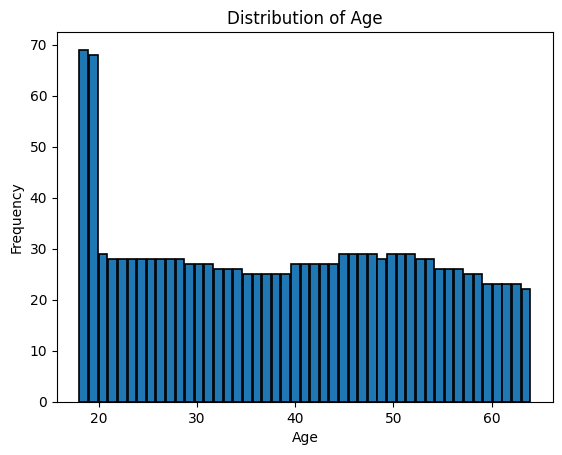

In [22]:

# Create histogram with gaps between bars
n, bins, patches = plt.hist(
    x=medical_df['age'],
    bins=47,
    edgecolor='black', 
    linewidth=1.2,  
    rwidth=0.9          
)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


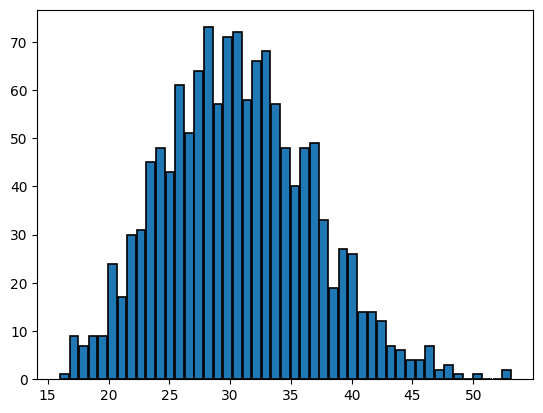

In [38]:
plt.hist(
    x=medical_df['bmi'],
    edgecolor='black',
    linewidth=1.2,
    bins=bins,
    rwidth=0.9
)
plt.show()

C:\Users\GADDAM\AppData\Local\Temp\ipykernel_17120\1088066460.py:15: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



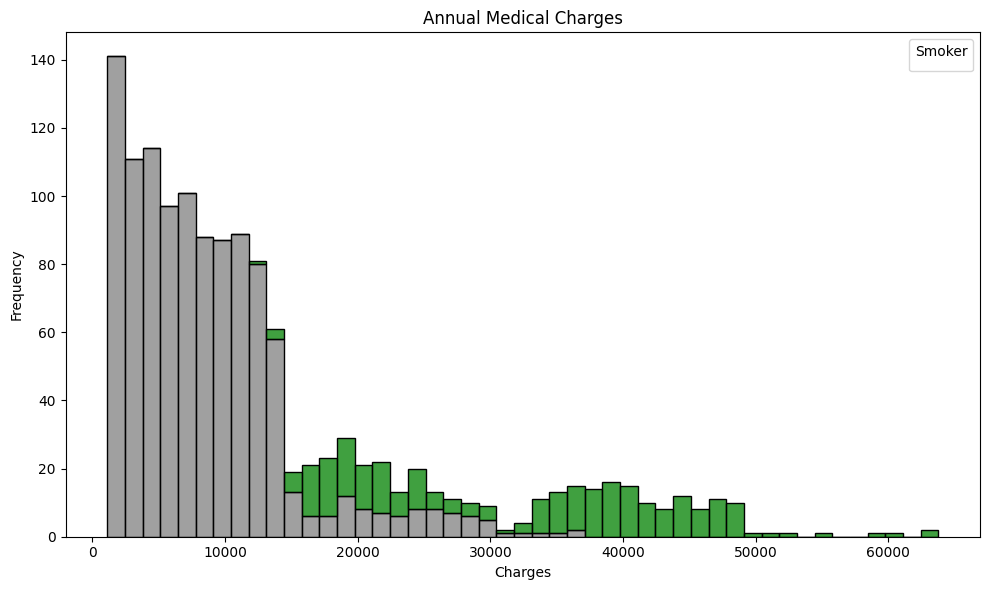

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
bins = 47
sns.histplot(data=medical_df, x='charges', hue='smoker', palette=['green', 'grey'], bins=bins, kde=False, multiple='stack', edgecolor='black')

# Customize appearance
ax.set_title('Annual Medical Charges')
ax.set_xlabel('Charges')
ax.set_ylabel('Frequency')
ax.legend(title='Smoker', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


C:\Users\GADDAM\AppData\Local\Temp\ipykernel_17120\1147943563.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



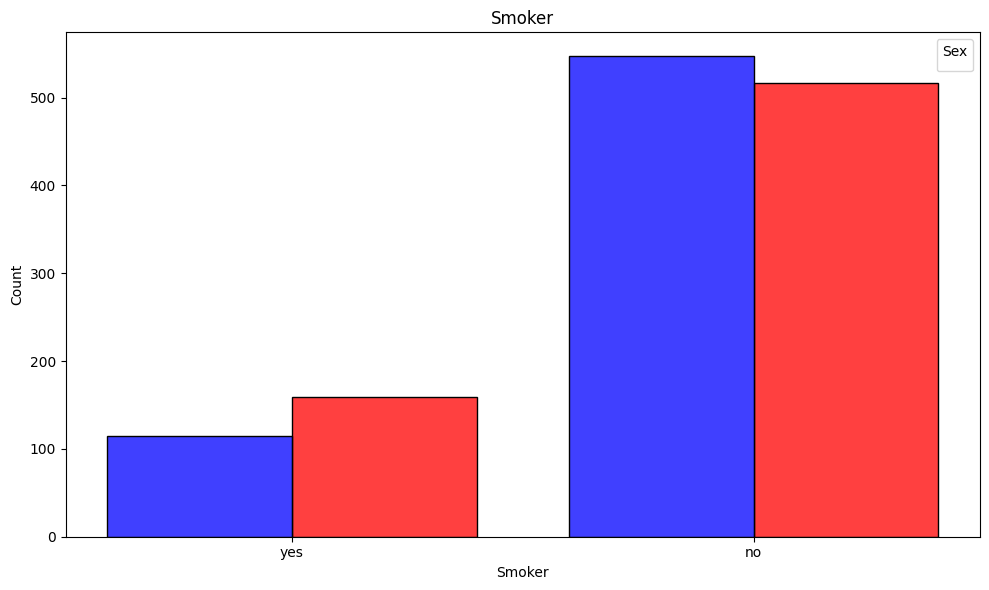

In [43]:
# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
sns.histplot(data=medical_df, x='smoker', hue='sex', multiple='dodge', shrink=0.8, palette=['blue', 'red'], edgecolor='black')

ax.set_title('Smoker')
ax.set_xlabel('Smoker')
ax.set_ylabel('Count')
ax.legend(title='Sex', loc='upper right')


plt.tight_layout()
plt.show()


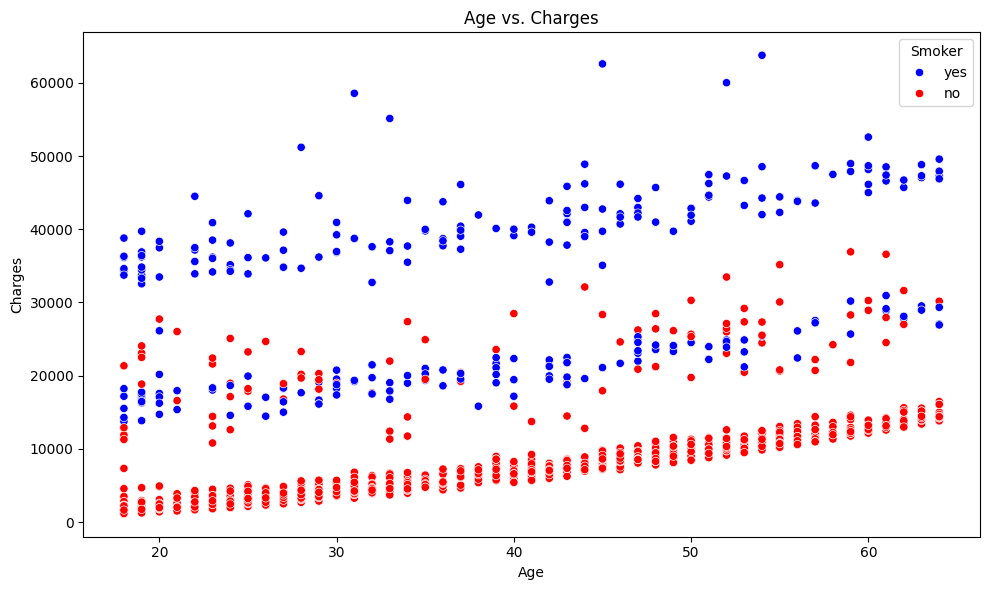

In [50]:

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=medical_df, 
                x='age', 
                y='charges', 
                hue='smoker', 
                palette=['blue', 'red']
                )  # marker size

# Customize appearance
ax.set_title('Age vs. Charges')
ax.set_xlabel('Age')
ax.set_ylabel('Charges')
ax.legend(title='Smoker', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


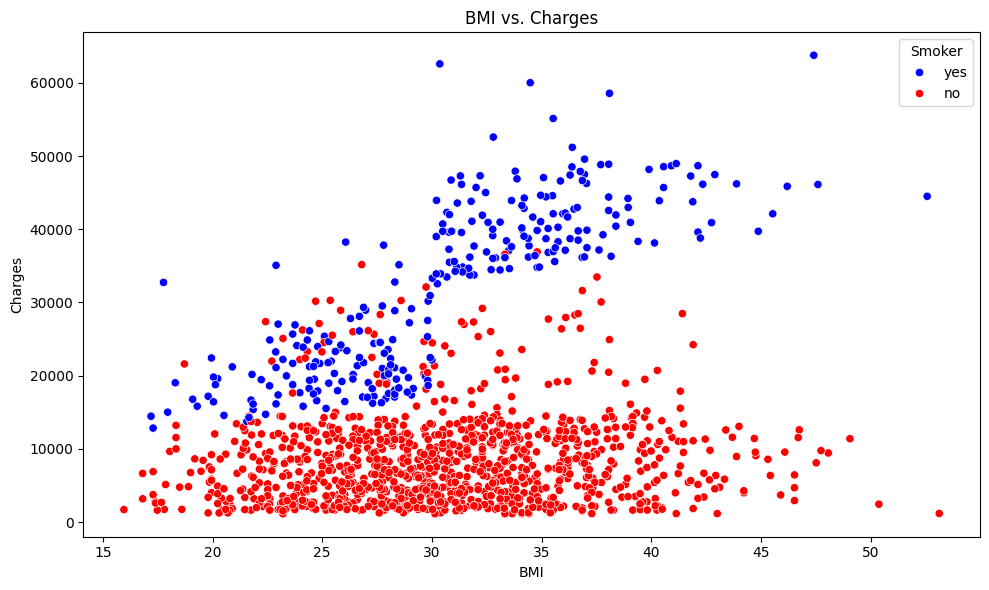

In [52]:
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(data=medical_df,
                x='bmi',
                y='charges',
                hue='smoker',
                palette=['blue',"red"]
                )
ax.set_title('BMI vs. Charges')
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')
ax.legend(title='Smoker', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


In [54]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [55]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [53]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

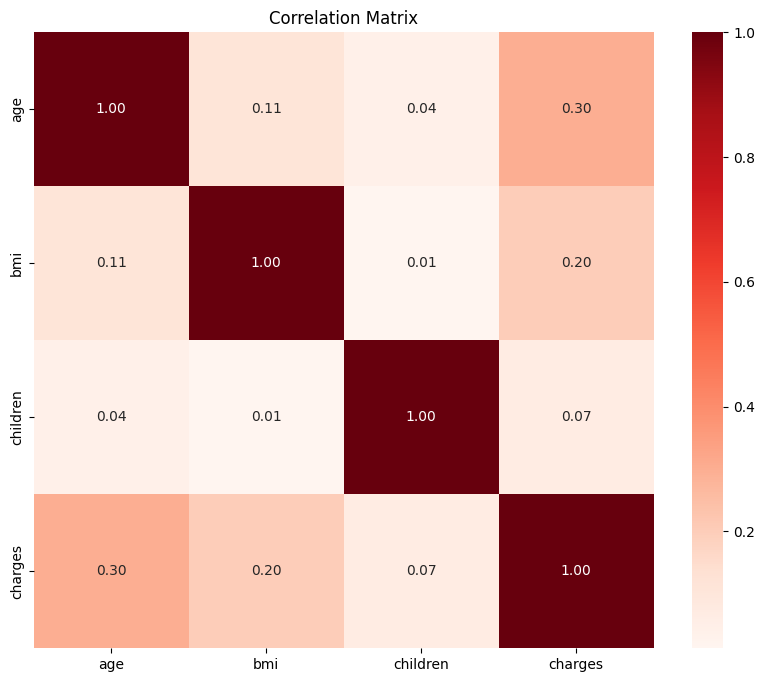

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_df = medical_df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='Reds', annot=True, fmt=".2f")

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [92]:
sex_code={'male':1,'female':0}
smoker_code={'yes':0,'no':1}
medical_df=pd.read_csv('medical.csv')
medical_df['sex']=medical_df['sex'].map(sex_code)
medical_df['smoker']=medical_df['smoker'].map(smoker_code)
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [93]:
from sklearn.linear_model import LinearRegression
X = medical_df.drop(columns=['charges','region'])
y = medical_df['charges']
model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   257.73498767   -128.63985357    322.36421449    474.41112061
 -23823.39253065]
Intercept: 11770.9305449879


In [94]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [95]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [102]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,0,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,1,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,1,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,1,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,1,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,1,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,1,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,1,2007.94500,0.0,0.0,0.0,1.0


In [103]:
from sklearn.linear_model import LinearRegression
X = medical_df.drop(columns=['charges'])
y = medical_df['charges']
model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   256.85635254   -131.3143594     339.19345361    475.50054515
 -23848.53454191    587.00923503    234.0453356    -448.01281436
   -373.04175627]
Intercept: 11322.986730717375
